In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Load the data
filepath = '../data/raw/train.csv'
data = pd.read_csv(filepath, index_col='id')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [9]:
data.tail()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1
11504797,Male,25,1,28.0,1,< 1 Year,No,32855.0,152.0,189,0


# Check basis info

In [8]:
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [14]:
data['Vehicle_Age'].value_counts()


Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [20]:
data['Vintage'].nunique()

290

In [ ]:
data['Policy_Sales_Channel'].nunique()

152

# Plotting

In [22]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender']) # 0: Female, 1: Male 
data['Vehicle_Age'] = le.fit_transform(data['Vehicle_Age']) #  0: 1-2 years, 1: < 1 year, 2: > 2 years
data['Vehicle_Damage'] = le.fit_transform(data['Vehicle_Damage']) # 0: No, 1: Yes

In [23]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


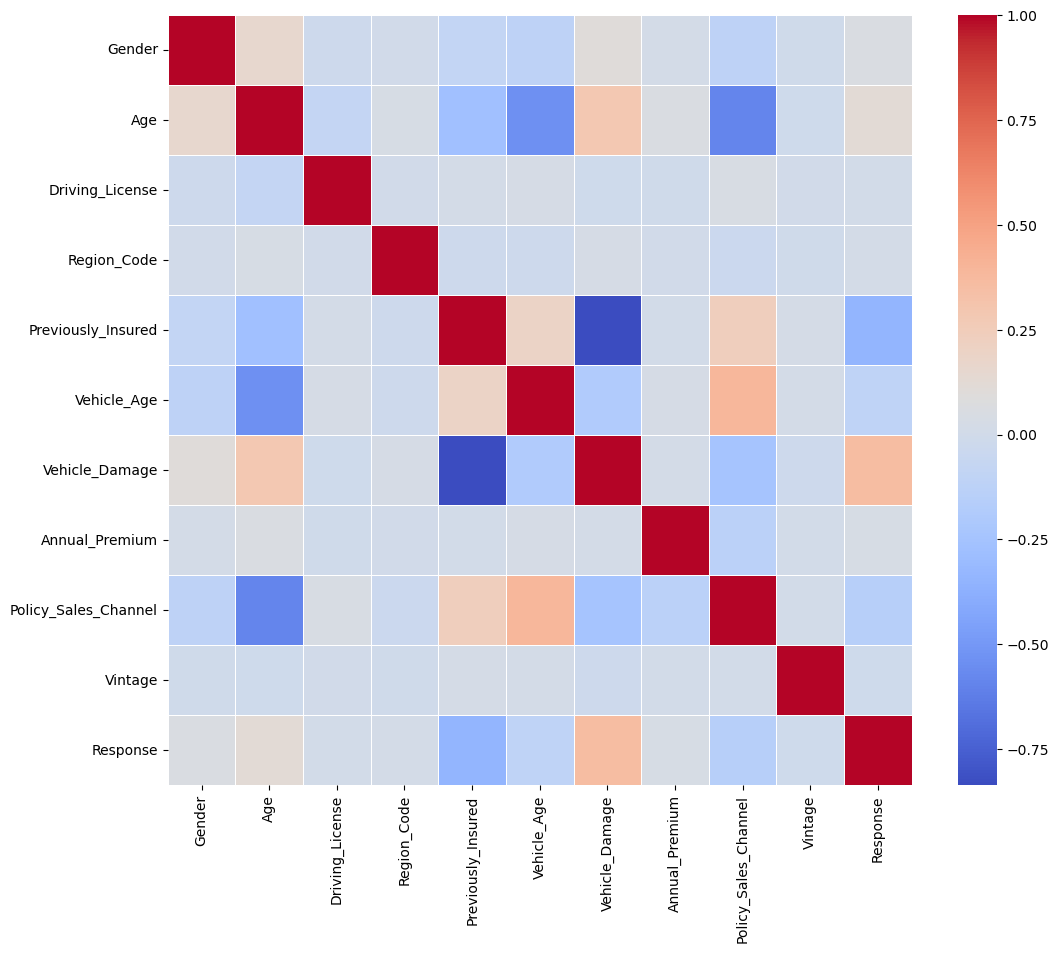

In [28]:
columns = data.columns.tolist()
columns_discrete = ['Gender','Driving_License','Previously_Insured' ,'Vehicle_Age', 'Vehicle_Damage']
columns_continuous = ['Age', 'Annual_Premium', 'Vintage']
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()

In [26]:
target_corr = data.corr()['Response'].drop('Response')
top_corr = target_corr.abs().sort_values(ascending=False)

print("Các cột có tương quan cao nhất với 'Response':")
print(top_corr)


Các cột có tương quan cao nhất với 'Response':
Vehicle_Damage          0.359780
Previously_Insured      0.345930
Policy_Sales_Channel    0.152733
Age                     0.122134
Vehicle_Age             0.111630
Gender                  0.055212
Annual_Premium          0.032261
Vintage                 0.015177
Region_Code             0.012816
Driving_License         0.009197
Name: Response, dtype: float64


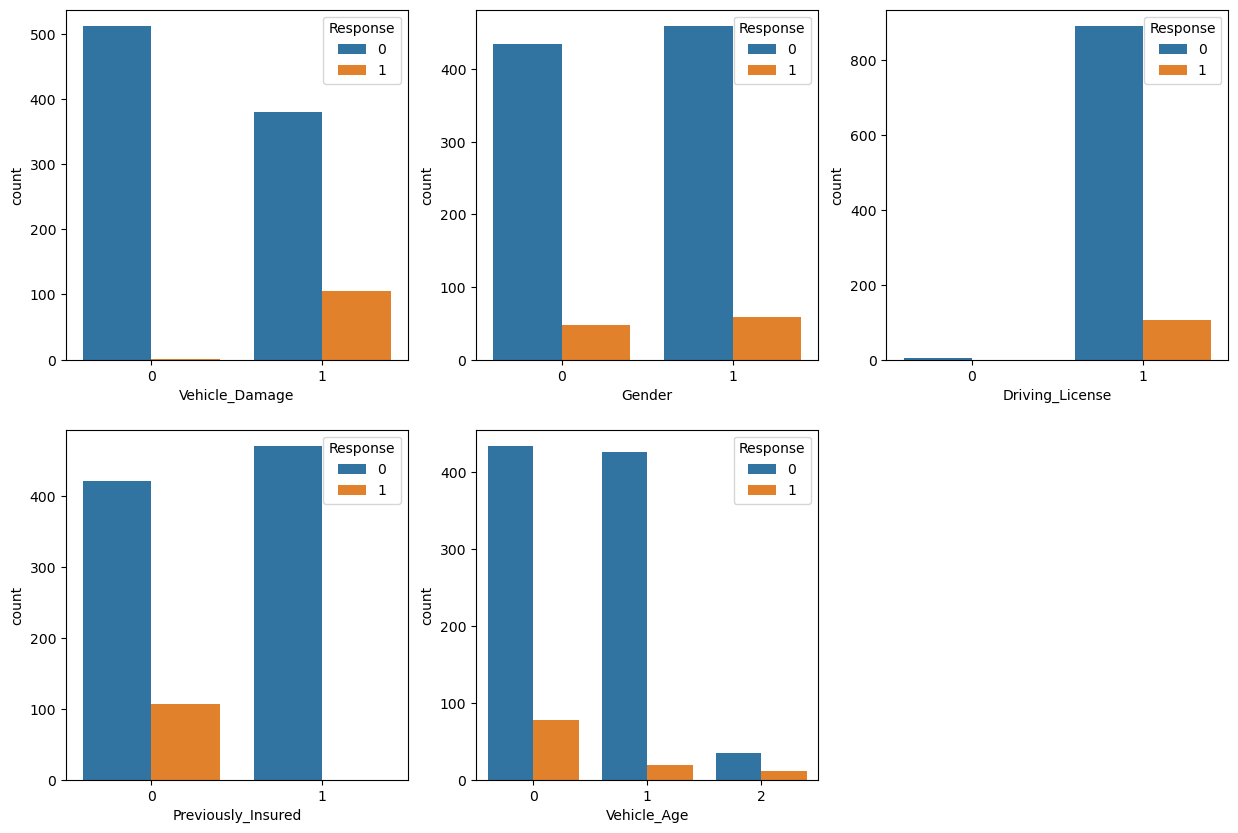

In [31]:
fig1, ax1 = plt.subplots(2, 3, figsize=(15, 10))
ax1.flat[-1].set_visible(False)
for r in range(2):
    for c in range(3):
        sns.countplot(data=data.head(1000),x=columns_discrete[r*3+c-1] , hue="Response" , ax=ax1[r,c])

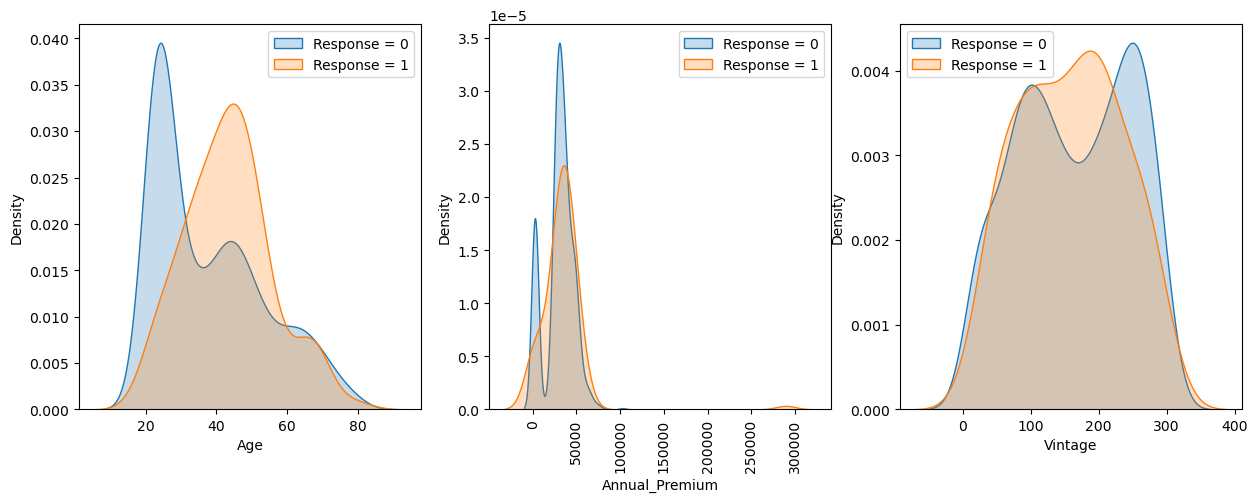

In [47]:
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 5))
for c in range(3):
    sns.kdeplot(data=data.head(1000)[data.head(1000)['Response'] == 0][columns_continuous[c]], label='Response = 0', fill=True, ax=ax2[c])
    sns.kdeplot(data=data.head(1000)[data.head(1000)['Response'] == 1][columns_continuous[c]], label='Response = 1', fill=True, ax=ax2[c])
    ax2[c].legend()
    ax2[1].tick_params(axis='x', rotation=90)